In [1]:
import matplotlib.pyplot as plt
import nest
import random


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Jun 13 2023 16:19:05

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



https://nest-simulator.org/

As with every other module for Python, the available functions can be explored.

In [2]:
ls "../nest-simulator-3.4"   #exploring NEST source files

ACKNOWLEDGMENTS.md  SECURITY.md         environment.yml     nestkernel/
CHANGES             bin/                examples/           pynest/
CMakeLists.txt      build_support/      lib/                sli/
CONTRIBUTING.md     cmake/              libnestutil/        testsuite/
LICENSE             debian/             models/             thirdparty/
README.md           doc/                nest/               tox.ini


In [3]:
#ls "../nest-simulator-3.4/models/" 

In [4]:
#cat "../nest-simulator-3.4/models/pp_psc_delta.h"

In [5]:
nest.help() #help options.

PyNEST - Python interface for the NEST Simulator

* ``nest.helpdesk()`` opens the NEST documentation in your browser.

* ``nest.__version__`` displays the NEST version.

* ``nest.node_models`` shows all available neuron and device models.

* ``nest.synapse_models`` shows all available synapse models.

* To get details on the model equations and parameters,
  please check out our model documentation at https://nest-simulator.readthedocs.io/en/stable/models/index.html.

* To get help on functions in the ``nest`` package, use Python's
  ``help()`` function or IPython's ``?``, e.g.
     - ``help(nest.Create)``
     - ``nest.Connect?``

For more information visit https://www.nest-simulator.org.



## Kernel

In [6]:
nest.ResetKernel()    #the NEST simulator core

In [7]:
nest.kernel_status 

{'adaptive_spike_buffers': True,
 'adaptive_target_buffers': True,
 'biological_time': 0.0,
 'buffer_size_spike_data': 2,
 'buffer_size_target_data': 2,
 'connection_rules': ('one_to_one',
  'all_to_all',
  'fixed_indegree',
  'fixed_outdegree',
  'pairwise_bernoulli',
  'symmetric_pairwise_bernoulli',
  'fixed_total_number'),
 'data_path': '',
 'data_prefix': '',
 'dict_miss_is_error': True,
 'growth_curves': ('gaussian', 'linear', 'sigmoid'),
 'growth_factor_buffer_spike_data': 1.5,
 'growth_factor_buffer_target_data': 1.5,
 'keep_source_table': True,
 'local_num_threads': 1,
 'local_spike_counter': 0,
 'max_buffer_size_spike_data': 8388608,
 'max_buffer_size_target_data': 16777216,
 'max_delay': 0.1,
 'max_num_syn_models': 512,
 'max_update_time': -inf,
 'min_delay': 0.1,
 'min_update_time': inf,
 'ms_per_tic': 0.001,
 'network_size': 0,
 'node_models': ('weight_recorder',
  'gauss_rate_ipn',
  'lin_rate_ipn',
  'sigmoid_rate_ipn',
  'sigmoid_rate_gg_1998_ipn',
  'tanh_rate_ipn',
  

In [8]:
#nest.node_models    #available neuron models

In [9]:
#nest.synapse_models #available synapse models

In [10]:
nest.rng_seed    #master random seed

143202461

In [11]:
nest.rng_seed = random.randint(1,10000000)  #set a new random seed for simulations

In [12]:
nest.rng_seed

5933608

## Create simple neurons and set up properties

https://nest-simulator.readthedocs.io/en/v3.4/tutorials/pynest_tutorial/part_1_neurons_and_simple_neural_networks.html#pynest-tutorial-1

In [13]:
nest.GetDefaults('iaf_psc_alpha')  #default parameters for the neuron model iaf_psc_alpha

{'archiver_length': 0,
 'available': (0,),
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'capacity': (0,),
 'E_L': -70.0,
 'element_type': 'neuron',
 'elementsize': 600,
 'frozen': False,
 'global_id': 0,
 'I_e': 0.0,
 'instantiations': (0,),
 'local': True,
 'model': 'iaf_psc_alpha',
 'model_id': 17,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'type_id': 'iaf_psc_alpha',
 'V_m': -70.0,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': -1}

In [14]:
#create a neuron of type iaf_psc_alpha (integrate-and-fire neuron with alpha-shaped postsynaptic currents)

neuron1 = nest.Create("iaf_psc_alpha") 

The function 'Create' returns a NodeCollection of the ids of all the created neurons, in this case only one, which we store in a variable called neuron1.

In [15]:
help(nest.Create)   #help

Help on function Create in module nest.lib.hl_api_nodes:

Create(model, n=1, params=None, positions=None)
    Create one or more nodes.
    
    Generates `n` new network objects of the supplied model type. If `n` is not
    given, a single node is created. Note that if setting parameters of the
    nodes fail, the nodes will still have been created.
    
    Note
    ----
    During network construction, create all nodes representing model neurons first, then all nodes
    representing devices (generators, recorders, or detectors), or all devices first and then all neurons.
    Otherwise, network connection can be slow, especially in parallel simulations of networks
    with many devices.
    
    Parameters
    ----------
    model : str
        Name of the model to create
    n : int, optional
        Number of nodes to create
    params : dict or list, optional
        Parameters for the new nodes. Can be any of the following:
    
            - A dictionary with either single valu

In [16]:
nest.Create?

In [17]:
neuron1 #returns a node collection of the ids of the created neurons.

NodeCollection(metadata=None, model=iaf_psc_alpha, size=1, first=1)

In [18]:
neuron1.get() #get the neuron1 parameters

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 1,
 'I_e': 0.0,
 'local': True,
 'model': 'iaf_psc_alpha',
 'model_id': 17,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -70.0,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': 0}

In [19]:
#get specific parameter values.

neuron1.get("C_m"), neuron1.C_m, neuron1.get({"C_m","I_e"}), neuron1.get(["V_reset", "V_th"]) 

(250.0, 250.0, {'I_e': 0.0, 'C_m': 250.0}, {'V_reset': -70.0, 'V_th': -55.0})

In [20]:
# equivalent ways to change the value of a parameter in a neuron.

neuron1.set(I_e = 375.0)
neuron1.set({"I_e": 376.0, "C_m":251.0}) 
neuron1.I_e = 377.0
print(neuron1.I_e, neuron1.C_m)

377.0 251.0


## Recording devices

In [21]:
# create a multimeter to record the membrane voltage of a neuron over the time.

multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

In [22]:
#create a device that records the spiking events produced by a neuron.

spikerecorder = nest.Create("spike_recorder")

In [23]:
#it shows command "Connect" description
nest.Connect?

In [24]:
nest.Connect(multimeter, neuron1) #connect multimeter to neuron1

In [25]:
nest.Connect(neuron1, spikerecorder) #connect neuron1 to the spike recorder

In [26]:
nest.Simulate(1000.0) #simulate for 1 second.


Jun 20 21:10:59 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Jun 20 21:10:59 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Not using OpenMP
    Not using MPI

Jun 20 21:10:59 SimulationManager::run [Info]: 
    Simulation finished.


In [27]:
dmm1 = multimeter.get() #explore recorded data

In [28]:
dmm1

{'element_type': 'recorder',
 'events': {'senders': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

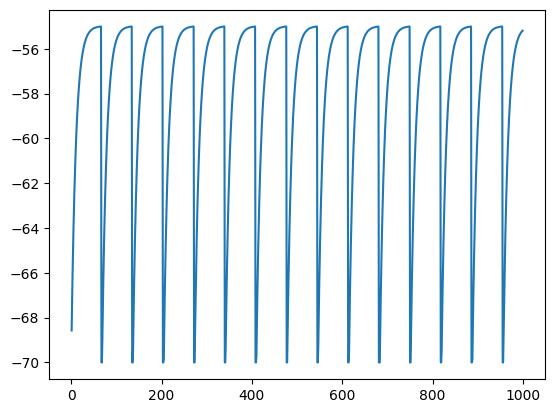

In [29]:
dmm1_vm = dmm1["events"]["V_m"]
dmm1_ts = dmm1["events"]["times"]
plt.plot(dmm1_ts, dmm1_vm)
plt.show()

In [30]:
dSD1 = spikerecorder.get()

In [31]:
dSD1

{'element_type': 'recorder',
 'events': {'senders': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  'times': array([ 66.3, 134.6, 202.9, 271.2, 339.5, 407.8, 476.1, 544.4, 612.7,
         681. , 749.3, 817.6, 885.9, 954.2])},
 'frozen': False,
 'global_id': 3,
 'label': '',
 'local': True,
 'model': 'spike_recorder',
 'model_id': 54,
 'n_events': 14,
 'node_uses_wfr': False,
 'origin': 0.0,
 'record_to': 'memory',
 'start': 0.0,
 'stop': 1.7976931348623157e+308,
 'thread': 0,
 'thread_local_id': 2,
 'time_in_steps': False,
 'vp': 0}

In [32]:
dSD1 = spikerecorder.get("events")

In [33]:
dSD1

{'senders': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'times': array([ 66.3, 134.6, 202.9, 271.2, 339.5, 407.8, 476.1, 544.4, 612.7,
        681. , 749.3, 817.6, 885.9, 954.2])}

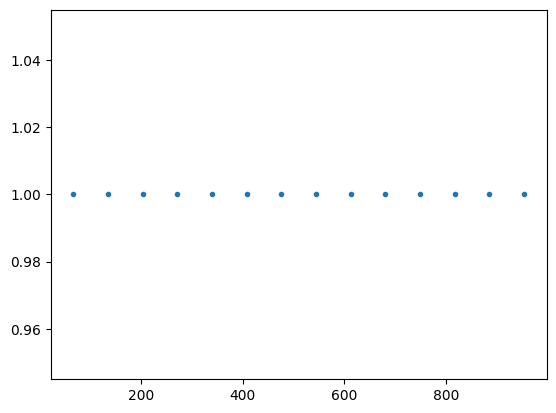

In [34]:
dSD1_ev = dSD1["senders"]
dSD1_ts = dSD1["times"]
plt.plot(dSD1_ts, dSD1_ev,'.')
plt.show()

## Adding noise

In [35]:
noise_ex = nest.Create("poisson_generator")
noise_ex.set(rate=1000.0)

In [36]:
noise_in = nest.Create("poisson_generator")
noise_in.set(rate=200.0)

In [37]:
nest.GetDefaults('static_synapse') #we will use a static synapse for connecting noise sources to the neuron.

{'delay': 1.0,
 'element_type': 'synapse',
 'has_delay': True,
 'num_connections': 2,
 'receptor_type': 0,
 'requires_symmetric': False,
 'sizeof': 32,
 'synapse_model': 'static_synapse',
 'synapse_modelid': 18,
 'weight': 1.0,
 'weight_recorder': ()}

In [38]:
syn_dict_ex = {"weight": 1.2} #static synapse, producing a postsynaptic current of 1.2pA amplitude (excitatory)
syn_dict_in = {"weight": -2.0} #static synapse, producing a postsynaptic current of -2pA amplitude (inhibitory)

In [39]:
nest.Connect(noise_ex, neuron1, syn_spec=syn_dict_ex) #make the connection using static synapse
nest.Connect(noise_in, neuron1, syn_spec=syn_dict_in) 

In [40]:
nest.Simulate(1000.0) #simulation for 1 second.


Jun 20 21:10:59 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Jun 20 21:10:59 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 1000
    Not using OpenMP
    Not using MPI

Jun 20 21:10:59 SimulationManager::run [Info]: 
    Simulation finished.


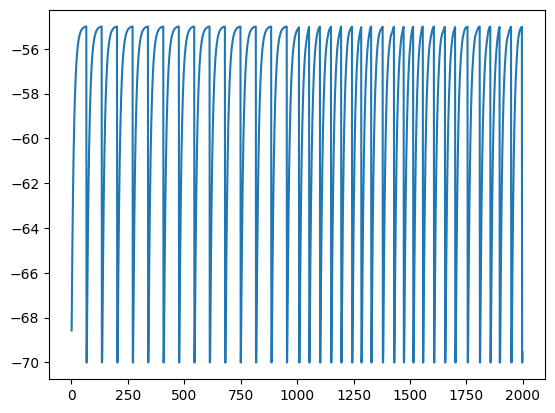

In [41]:
dmm1 = multimeter.get()
dmm1_vm = dmm1["events"]["V_m"]
dmm1_ts = dmm1["events"]["times"]
plt.plot(dmm1_ts, dmm1_vm)
plt.show()

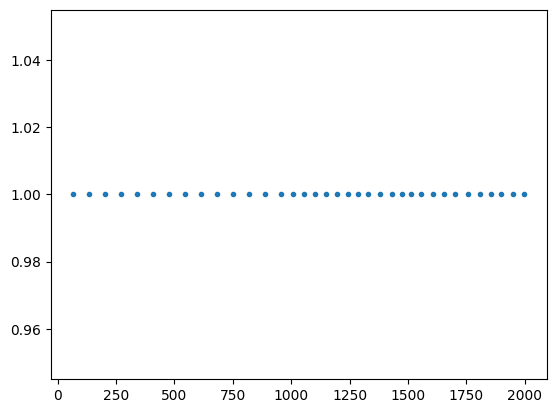

In [42]:
dSD1 = spikerecorder.get("events")
dSD1_ev = dSD1["senders"]
dSD1_ts = dSD1["times"]
plt.plot(dSD1_ts, dSD1_ev,'.')
plt.show()

In [43]:
neuron2 = nest.Create("iaf_psc_alpha")  #create a neuron of type iaf_psc_delta
neuron2.I_e = 70.0

In [44]:
multimeter2 = nest.Create("multimeter") #create a recording device
multimeter2.set(record_from=["V_m","I_syn_ex","I_syn_in"])
nest.Connect(multimeter2, neuron2)

In [45]:
nest.Connect(neuron1, neuron2, syn_spec={"weight":1520.0, "delay":1.0}) #static_synapse

In [46]:
nest.Simulate(1000.)


Jun 20 21:10:59 NodeManager::prepare_nodes [Info]: 
    Preparing 7 nodes for simulation.

Jun 20 21:10:59 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 7
    Simulation time (ms): 1000
    Not using OpenMP
    Not using MPI

Jun 20 21:10:59 SimulationManager::run [Info]: 
    Simulation finished.


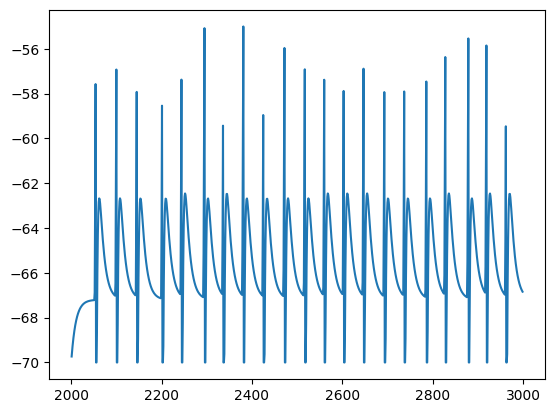

In [47]:
dmm2 = multimeter2.get()
dmm2_vm = dmm2["events"]["V_m"]

dmm2_ts = dmm2["events"]["times"]

plt.plot(dmm2_ts, dmm2_vm)
plt.show()

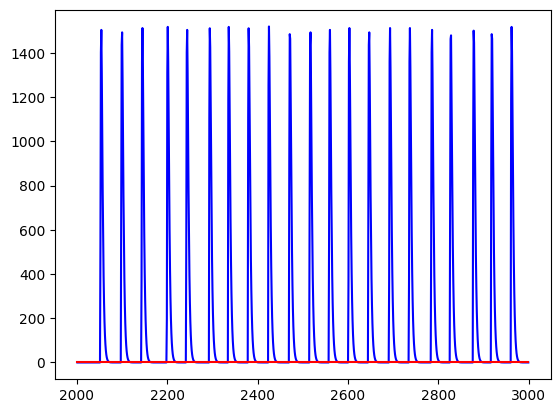

In [48]:
dmm2_Iex = dmm2["events"]["I_syn_ex"]
dmm2_Iin = dmm2["events"]["I_syn_in"]
plt.plot(dmm2_ts, dmm2_Iex,'b')
plt.plot(dmm2_ts, dmm2_Iin,'r')
plt.show()

In [49]:
dmm2

{'element_type': 'recorder',
 'events': {'I_syn_ex': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.33439482e+02,
